In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
relevant_prices = [[(20, 2), (10, 1)], [(30, 5), (5, 2)]]

days_prices = []

for day in relevant_prices:
    days_prices.append(np.average([x[1] for x in day], weights=[x[0] for x in day]))

In [21]:
print(days_prices)

[1.6666666666666667, 4.571428571428571]


In [22]:
last_days = 2

# days_prices = [1/, 3, 2, 5, 6]

x = np.arange(0, last_days)
y = np.array(days_prices)
z = np.polyfit(x, y, 2)

p = np.poly1d(z)
acceptable = p(last_days)

print(x, y, acceptable)

[0 1] [1.66666667 4.57142857] 10.38095238095238


C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


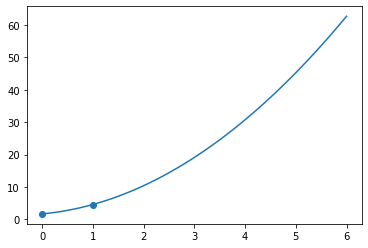

In [23]:
plt.scatter(x, y)
xs = np.linspace(0, 6)
ys = p(xs)
plt.plot(xs, ys)

In [760]:
data = pd.read_csv('csvs/data_new.csv', delimiter=';')
# data

In [761]:
prs = data[data['product']=='PEARLS'].reset_index()
bnn = data[data['product']=='BANANAS'].reset_index()
# bnn

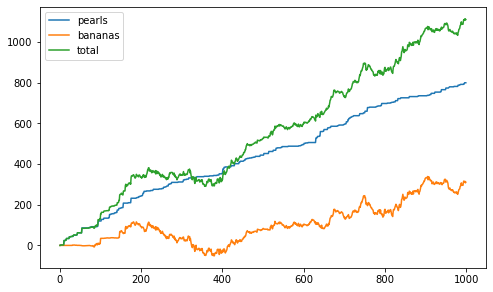

In [762]:
plt.plot(prs['profit_and_loss'], label='pearls')
plt.plot(bnn['profit_and_loss'], label='bananas')
plt.plot(bnn['profit_and_loss'].add(prs['profit_and_loss']), label='total')
plt.legend()

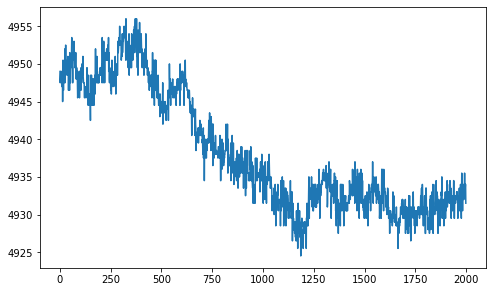

In [198]:
plt.plot(bnn['mid_price'])

In [750]:
def reweigh(xs, ys, a=0):
    out_x = []
    out_y = []
    for (x, y) in zip(xs, ys):
        l = a * int(np.power(len(ys) - x, -20.1)) + 1
        for i in range(l):
            out_x.append(x)
            out_y.append(y)
    return out_x, out_y 

In [757]:
timesteps = bnn.index

days = 25

avgs = []

for time in timesteps:
    if time < days:
        avgs.append(4900)
        continue
    x = np.arange(0, days)
        
    x, ys = reweigh(x, bnn['mid_price'][time-days:time])
    z = np.polyfit(x, ys, 0.1)
    
    p = np.poly1d(z)
    acceptable = p(days)
    avgs.append(acceptable)

In [758]:
print(ys)

[4898.0, 4895.5, 4896.0, 4895.5, 4895.5, 4896.0, 4895.5, 4896.0, 4894.5, 4894.5, 4894.5, 4894.0, 4894.0, 4893.5, 4895.0, 4893.5, 4891.5, 4893.5, 4893.5, 4895.5, 4891.5, 4892.5, 4890.5, 4894.0, 4892.5]


NameError: name 'avgs' is not defined

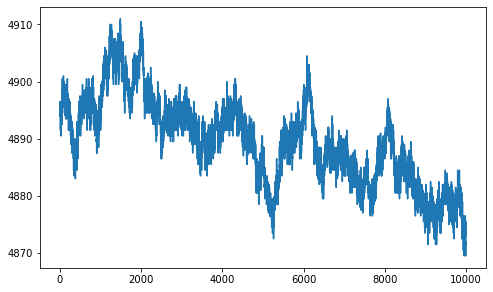

In [30]:
plt.rcParams["figure.figsize"] = (8, 4.8)

plt.plot(bnn['mid_price'])
plt.plot(avgs)
# plt.xlim(0, 100)

(1.127688844422211, 1.4884695013069458)

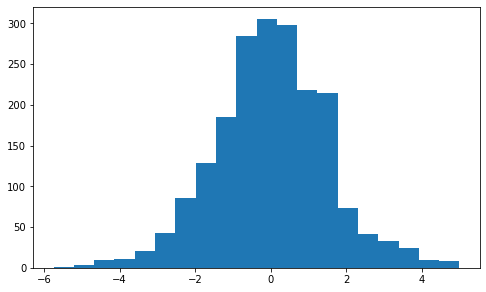

In [411]:
plt.hist(avgs-bnn['mid_price'], bins=20)
(np.mean(np.abs(avgs-bnn['mid_price'])), np.std(avgs-bnn['mid_price']))

In [190]:
mns = []
stds = []
poly = 4
for days in range(2, 100):
    print(days, end='\r')
    timesteps = bnn.index

    avgs = []

    for time in timesteps:
        if time < days:
            avgs.append(4950)
            continue

        ys = bnn['mid_price'][time-days:time]
        x = np.arange(0, days)
        z = np.polyfit(x, ys, poly)

        p = np.poly1d(z)
        acceptable = p(days)
        avgs.append(acceptable)
    mns.append(np.mean(np.abs(avgs-bnn['mid_price'])))
    stds.append(np.std(avgs-bnn['mid_price']))

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: 

poly 1: 14 days

2: 44

In [191]:
results.append([poly, np.argmin(mns), mns[np.argmin(mns)], np.argmin(stds), stds[np.argmin(stds)]])
results

[[1, 14, 1.0987562499999557, 14, 1.4534963373786995],
 [2, 29, 1.165336040044539, 44, 1.523225741104299],
 [3, 64, 1.2046309731935256, 64, 1.5673341621371413],
 [4, 80, 1.2423236518692424, 72, 1.6113705616451321]]

In [179]:
np.argmin(stds)

64

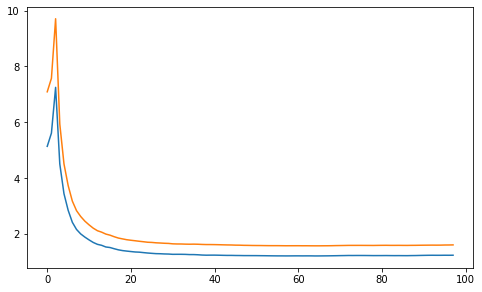

In [180]:
plt.plot(mns)

plt.plot(stds)

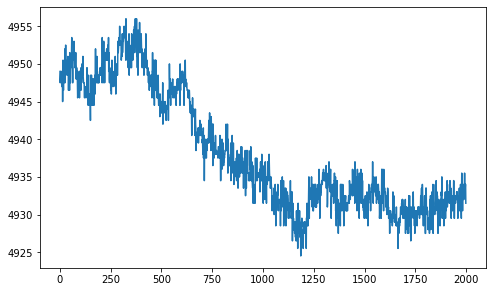

In [370]:
plt.plot(bnn['mid_price'])

In [408]:
hi = []
lo = []

window = 5
for time in bnn.index:
    d = bnn['mid_price'][max(0, time-window):time]
    
    hi.append(np.max(d))
    lo.append(np.min(d))

(0.0, 25.0)

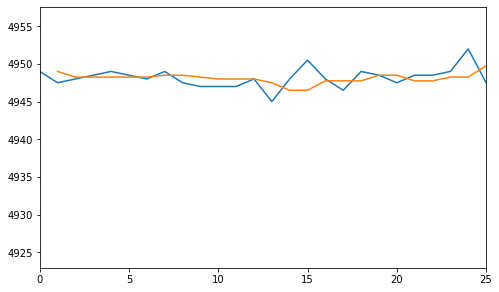

In [424]:
plt.plot(bnn['mid_price'])
# plt.fill_between(bnn.index, lo, hi, color='orange')
plt.plot(np.mean([hi, lo], axis = 0))
plt.xlim(0, 25)

In [410]:
avgs = np.mean([hi, lo], axis = 0)

In [777]:
stds = []
means = []
window = 5
for time in bnn.index:
    low = max(0, time-window)
    if low==0:
        stds.append(0)
        means.append(0)
        continue
    ys = bnn['mid_price'][low:time]
    x = np.arange(0, window)
#     print(x, ys)
    z = np.polyfit(x, ys, 3)
    
    y_hat = np.poly1d(z)(x)
    means.append(np.mean(np.abs(ys - y_hat)))
    stds.append(np.std(y_hat))

In [780]:
hi = []
lo = []
window = 15
for time in bnn.index:
    low = max(0, time-window)
    if low==0:
        hi.append(bnn['mid_price'][low])
        lo.append(bnn['mid_price'][low])
        continue
    a = 1.8
    d = np.mean(bnn['mid_price'][low:time])
    delta = stds[time-1]
#     delta = max(1, delta)
    hi.append(d + delta * a)
    lo.append(d - delta * a)

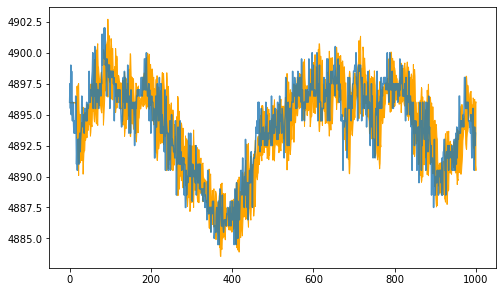

In [781]:
plt.plot(bnn['mid_price'], alpha=0.8)
plt.fill_between(bnn.index, hi, lo, color='orange')
# plt.xlim(0, 1200)

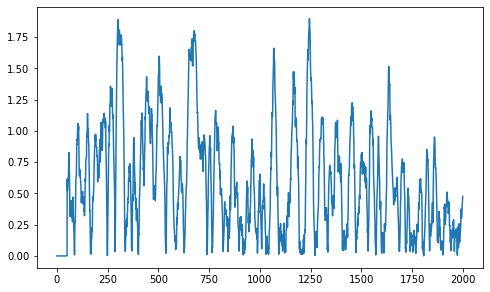

In [719]:
# plt.plot(means)
plt.plot(stds)

In [720]:
np.mean(stds)

0.5897690286883963

In [644]:
data = pd.read_csv('island-data-bottle-round-1/trades_round_1_day_0_nn.csv', delimiter=';')
data

timestamp  buyer  seller   symbol   currency    price  quantity
0           100    NaN     NaN   PEARLS  SEASHELLS  10002.0         1
1           300    NaN     NaN   PEARLS  SEASHELLS   9998.0         2
2           300    NaN     NaN   PEARLS  SEASHELLS   9998.0         1
3           400    NaN     NaN  BANANAS  SEASHELLS   4899.0         9
4           500    NaN     NaN  BANANAS  SEASHELLS   4899.0         1
...         ...    ...     ...      ...        ...      ...       ...
5162     998800    NaN     NaN   PEARLS  SEASHELLS  10002.0         1
5163     998800    NaN     NaN  BANANAS  SEASHELLS   4870.0         1
5164     999300    NaN     NaN  BANANAS  SEASHELLS   4875.0        17
5165     999500    NaN     NaN  BANANAS  SEASHELLS   4869.0         2
5166     999500    NaN     NaN   PEARLS  SEASHELLS   9995.0         2

[5167 rows x 7 columns]

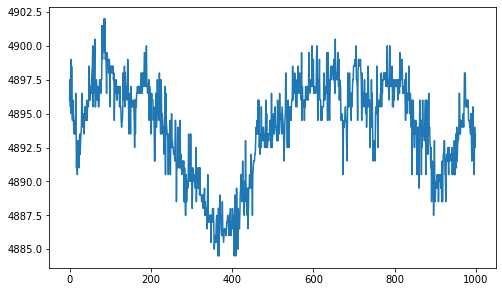

In [787]:
midprice = bnn['mid_price']
plt.plot(midprice)

In [788]:
z = np.polyfit(midprice.index, midprice, 30)
y_hat = np.poly1d(z)(midprice.index)

C:\Users\drobi\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3369: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


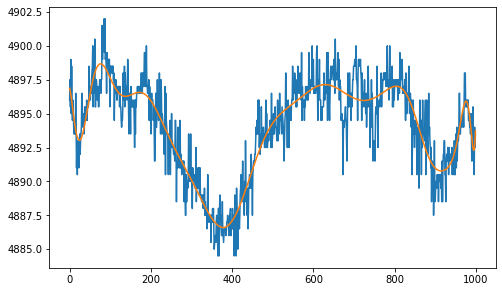

In [789]:
plt.plot(midprice)
plt.plot(y_hat)

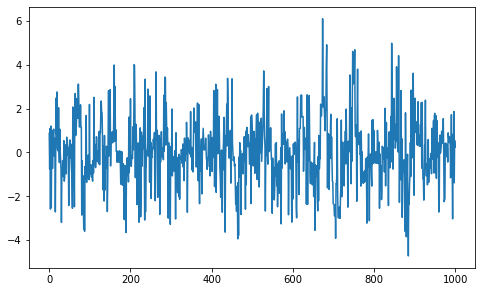

In [790]:
plt.plot(y_hat - midprice)

In [791]:
s = np.std(y_hat - midprice)

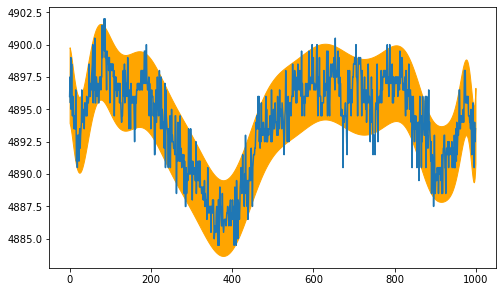

In [792]:
plt.plot(midprice)
plt.fill_between(midprice.index, y_hat + 2*s, y_hat - 2*s, color='orange')

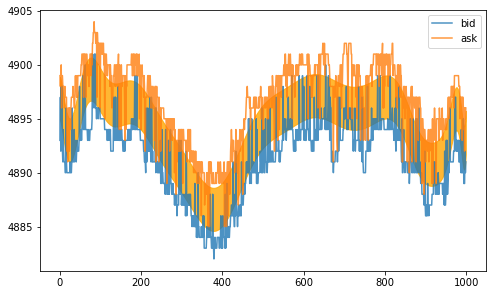

In [801]:
plt.plot(bnn.index, bnn['bid_price_1'], label='bid', alpha=0.8)
plt.plot(bnn.index, bnn['ask_price_1'], label='ask', alpha=0.8)
plt.fill_between(midprice.index, y_hat + 2, y_hat - 2, color='orange', alpha=0.8)
plt.legend()

In [799]:
bnn[['ask_price_1', 'bid_price_1']]

ask_price_1  bid_price_1
0           4899         4893
1           4898         4897
2           4899         4892
3           4900         4898
4           4896         4894
..           ...          ...
995         4896         4889
996         4892         4889
997         4896         4892
998         4895         4890
999         4896         4891

[1000 rows x 2 columns]

In [800]:
data

day  timestamp  product  bid_price_1  bid_volume_1  bid_price_2  \
0       0          0   PEARLS         9998             9       9995.0   
1       0          0  BANANAS         4893             9       4892.0   
2       0        100   PEARLS        10002             1      10000.0   
3       0        100  BANANAS         4897             1       4892.0   
4       0        200   PEARLS         9996             1       9995.0   
...   ...        ...      ...          ...           ...          ...   
1995    0      99700   PEARLS         9995            26          NaN   
1996    0      99800   PEARLS         9996             1       9995.0   
1997    0      99800  BANANAS         4890            26          NaN   
1998    0      99900  BANANAS         4891             5       4890.0   
1999    0      99900   PEARLS         9998             6       9996.0   

      bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0             23.0          NaN           NaN        10005            23   
1             23.0          NaN           NaN         4899            23   
2              2.0       9998.0           4.0        10004             1   
3             26.0          NaN           NaN         4898            22   
4             21.0          NaN           NaN        10004             1   
...            ...          ...           ...          ...           ...   
1995           NaN          NaN           NaN        10005            26   
1996          25.0          NaN           NaN        10002             5   
1997           NaN          NaN           NaN         4895             5   
1998          28.0          NaN           NaN         4896            28   
1999           1.0       9995.0          27.0        10004             1   

      ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0             NaN           NaN          NaN           NaN    10001.5   
1             NaN           NaN          NaN           NaN     4896.0   
2         10005.0          21.0          NaN           NaN    10003.0   
3             NaN           NaN          NaN           NaN     4897.5   
4         10005.0          21.0          NaN           NaN    10000.0   
...           ...           ...          ...           ...        ...   
1995          NaN           NaN          NaN           NaN    10000.0   
1996      10004.0           1.0      10005.0          25.0     9999.0   
1997       4896.0           1.0       4897.0          25.0     4892.5   
1998          NaN           NaN          NaN           NaN     4893.5   
1999      10005.0          27.0          NaN           NaN    10001.0   

      profit_and_loss  
0            0.000000  
1            0.000000  
2            0.000000  
3            0.000000  
4            2.000000  
...               ...  
1995       800.000000  
1996       800.000000  
1997       307.695312  
1998       310.929688  
1999       800.000000  

[2000 rows x 17 columns]

In [65]:
data = pd.read_csv('island-data-bottle-round-2/prices_round_2_day_1.csv', delimiter=';')
data

day  timestamp       product  bid_price_1  bid_volume_1  bid_price_2  \
0        1          0  PINA_COLADAS        15013            34      15012.0   
1        1          0       BANANAS         4871             9       4870.0   
2        1          0      COCONUTS         8003           200          NaN   
3        1          0        PEARLS         9998             9       9995.0   
4        1        100       BANANAS         4875             1       4871.0   
...    ...        ...           ...          ...           ...          ...   
39995    1     999800        PEARLS         9996             2       9995.0   
39996    1     999900  PINA_COLADAS        14850            21      14849.0   
39997    1     999900       BANANAS         4820            20          NaN   
39998    1     999900        PEARLS         9995            20          NaN   
39999    1     999900      COCONUTS         7922           178          NaN   

       bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0              54.0          NaN           NaN        15016            88   
1              23.0          NaN           NaN         4877            23   
2               NaN          NaN           NaN         8006           200   
3              23.0          NaN           NaN        10005            23   
4               4.0       4870.0          22.0         4877            22   
...             ...          ...           ...          ...           ...   
39995          22.0          NaN           NaN        10004             2   
39996          62.0          NaN           NaN        14853            83   
39997           NaN          NaN           NaN         4827            20   
39998           NaN          NaN           NaN        10005            20   
39999           NaN          NaN           NaN         7925           178   

       ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0              NaN           NaN          NaN           NaN    15014.5   
1              NaN           NaN          NaN           NaN     4874.0   
2              NaN           NaN          NaN           NaN     8004.5   
3              NaN           NaN          NaN           NaN    10001.5   
4              NaN           NaN          NaN           NaN     4876.0   
...            ...           ...          ...           ...        ...   
39995      10005.0          22.0          NaN           NaN    10000.0   
39996          NaN           NaN          NaN           NaN    14851.5   
39997          NaN           NaN          NaN           NaN     4823.5   
39998          NaN           NaN          NaN           NaN    10000.0   
39999          NaN           NaN          NaN           NaN     7923.5   

       profit_and_loss  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  
...                ...  
39995           -224.0  
39996         115804.0  
39997          97704.0  
39998           -224.0  
39999          20068.0  

[40000 rows x 17 columns]

In [66]:
prs = data[data['product']=='PEARLS'].reset_index()
bnn = data[data['product']=='BANANAS'].reset_index()
pcl = data[data['product']=='PINA_COLADAS'].reset_index()
ccn = data[data['product']=='COCONUTS'].reset_index()

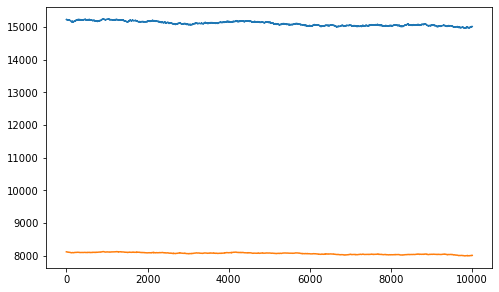

In [67]:
mid_pcl_t = pcl['mid_price']
mid_ccn_t = ccn['mid_price']

plt.plot(mid_pcl)
plt.plot(mid_ccn)
# plt.xlim(0, 2000)

In [19]:
np.dot(mid_pcl, mid_ccn) / len(mid_ccn)

1940.9754383675001

In [209]:
res = []

for i in range(1, len(means_pina)-1):
    print(i, end='\r')
    res.append(np.dot(means_pina[1:][i:], means_coco[1:][:-i]) / (len(means_pina) - i))

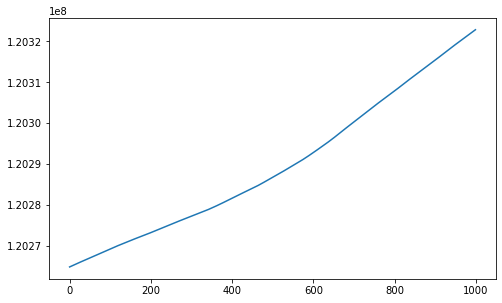

In [212]:
plt.plot(res[:1000])

In [70]:
pina = mid_pcl
coco = mid_ccn

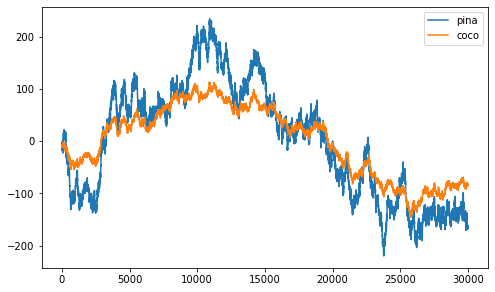

In [193]:
plt.plot(m_pina, label='pina')
plt.plot(m_coco, label='coco')
plt.legend()
# plt.xlim(14000, 16000)

In [72]:
m_pina = pina - np.mean(pina)
m_coco = coco - np.mean(coco)

(2000.0, 2200.0)

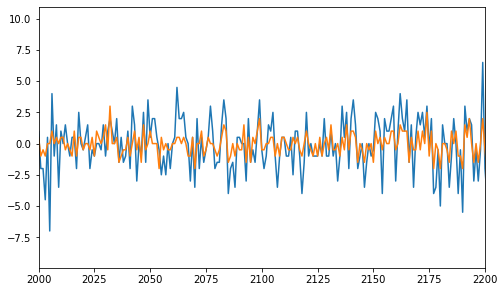

In [77]:
plt.plot(np.diff(m_pina))
plt.plot(np.diff(m_coco))
plt.xlim(2000, 2200)

In [85]:
pina_diff = np.abs(np.diff(pina))
coco_diff = np.abs(np.diff(coco))

In [86]:
res = []

for i in range(1, len(pina_diff)):
    res.append(np.dot(pina_diff[i:], coco_diff[:-i]) / (len(pina_diff) - i))

In [279]:
m = 500
d = 160

means_pina = []
diffs_pina = []
for t in range(len(pina)):
    ts = max(0, t-m)
    if t < d:
        means_pina.append(np.mean(pina[ts:t]))
        diffs_pina.append(0)
        continue
        
    means_pina.append(np.mean(pina[ts:t]))
    diffs_pina.append(means_pina[-1] - np.mean(means_pina[-d:-1]))

means_coco = []
diffs_coco = []
for t in range(len(coco)):
    ts = max(0, t-m)
    if t < d:
        means_coco.append(np.mean(coco[ts:t]))
        diffs_coco.append(0)
        continue
        
    means_coco.append(np.mean(coco[ts:t]))
    diffs_coco.append(means_coco[-1] - np.mean(means_coco[-d:-1]))

C:\Users\drobi\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\drobi\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


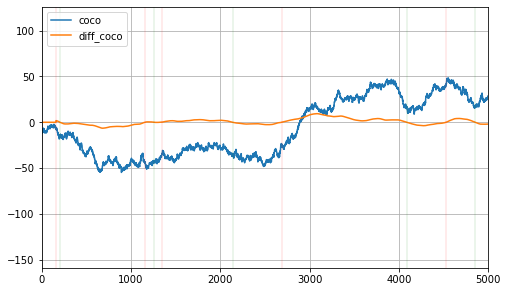

In [280]:
up = []
down = []
for i in range(1, len(diffs_pina)):
    if diffs_coco[i-1] <= 0 and diffs_coco[i] > 0:
        up.append(i)
    if diffs_coco[i-1] > 0 and diffs_coco[i] <= 0:
        down.append(i)

# plt.plot(m_pina, label='pina')
plt.plot(m_coco, label='coco')
# plt.plot(diffs_pina, label='diff_pina')
plt.plot(diffs_coco, label='diff_coco')
# plt.plot(means_pina - np.mean(pina), label='mean_pina')
# plt.plot(means_coco - np.mean(coco), label='mean_coco')
[plt.axvline(x, color='red', alpha = 0.1) for x in up]
[plt.axvline(x, color='green', alpha = 0.1) for x in down]
plt.legend()
plt.xlim(0, 5000)
plt.grid()

In [281]:
p = 0
for i in range(1, len(diffs_pina)):
    if diffs_coco[i-1] < 0 and diffs_coco[i] > 0:
        p =- coco[i]
    if diffs_coco[i-1] > 0 and diffs_coco[i] < 0:
        p =+ coco[i]
p

7919.0

In [263]:
[1, 2, 3, 4, 4][-2:]

[4, 4]